In [11]:
import pandas as pd

# Load Brent oil prices data
brent_data = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')

# Load supplementary economic indicators data
economic_data = pd.read_csv('/content/GlobalEconomyIndicators.csv')

# Display the first few rows of each dataset
brent_data.head()
economic_data.head()


<ipython-input-11-7ff1d71caa37>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data = pd.read_csv('/content/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')


,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [63]:
brent_data = pd.read_csv('/content/BrentOilPrices.csv')
brent_data['Date']=pd.to_datetime(brent_data['Date'])
# Find the date of the highest price
max_price_date = brent_data.loc[brent_data['Price'].idxmax(), 'Date']
max_price_value = brent_data['Price'].max()

print(f"The highest price of {max_price_value} occurred on {max_price_date}")


<ipython-input-63-aa55b4b63d30>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_data['Date']=pd.to_datetime(brent_data['Date'])


The highest price of 143.95 occurred on 2008-07-03 00:00:00


In [64]:
# Find the date of the lowest price
min_price_date = brent_data.loc[brent_data['Price'].idxmin(), 'Date']
min_price_value = brent_data['Price'].min()

print(f"The lowest price of {min_price_value} occurred on {min_price_date}")


The lowest price of 9.1 occurred on 1998-12-10 00:00:00


In [65]:
# Check for stationarity using the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(brent_data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')



ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Value (1%): -3.4310783342658615
Critical Value (5%): -2.861861876398633
Critical Value (10%): -2.566941329781918


In [67]:
# Differencing the data to achieve stationarity
brent_data['Price_diff'] = brent_data['Price'].diff().dropna()

# Drop the NaN values created by differencing
data_diff = brent_data.dropna()

# Re-check for stationarity using the Dickey-Fuller test on differenced data
result_diff = adfuller(data_diff['Price_diff'])
print('ADF Statistic (differenced):', result_diff[0])
print('p-value (differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value (differenced) ({key}): {value}')



ADF Statistic (differenced): -15.52936758004802
p-value (differenced): 2.230740510516298e-28
Critical Value (differenced) (1%): -3.4310783342658615
Critical Value (differenced) (5%): -2.861861876398633
Critical Value (differenced) (10%): -2.566941329781918


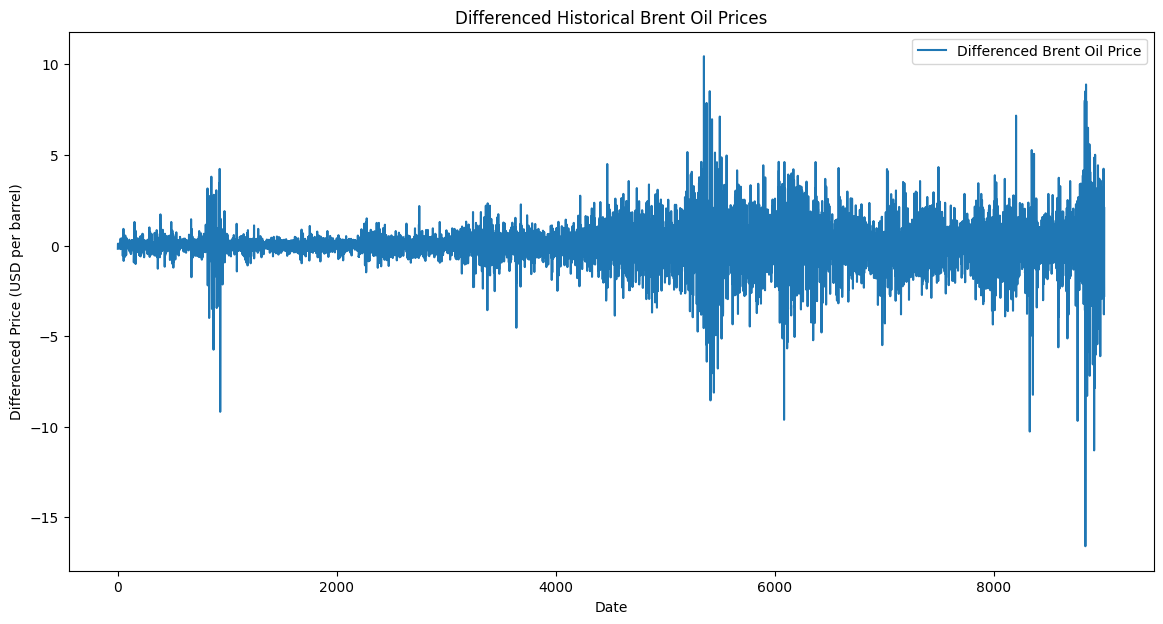

In [68]:
# Plot the differenced series
plt.figure(figsize=(14, 7))
plt.plot(data_diff['Price_diff'], label='Differenced Brent Oil Price')
plt.title('Differenced Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price (USD per barrel)')
plt.legend()
plt.show()




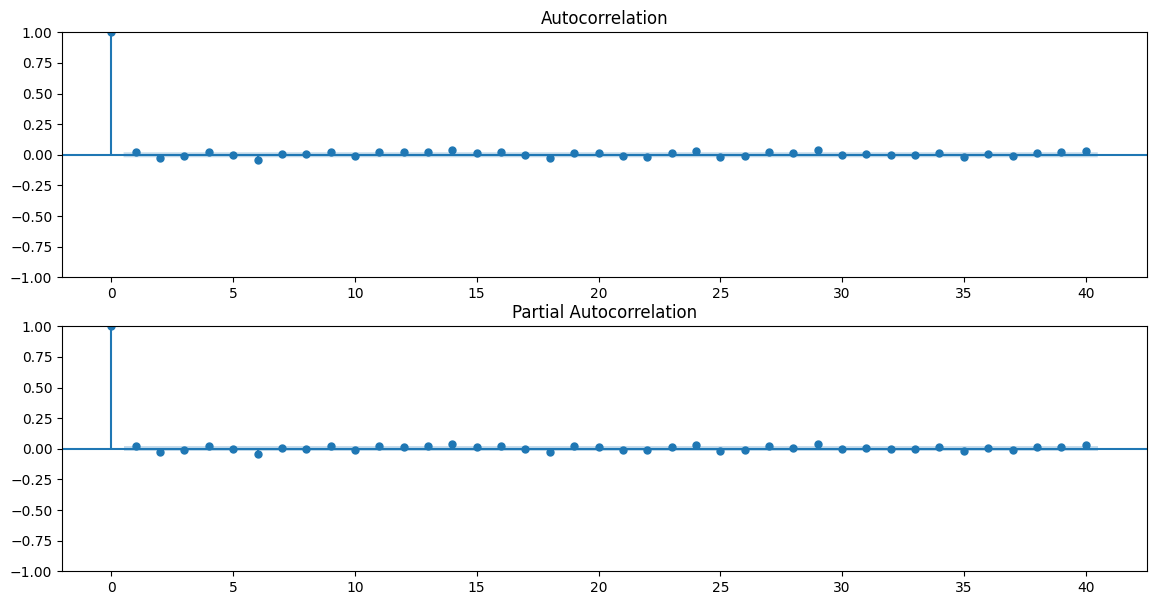

In [69]:
# Plot the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 7))
plt.subplot(211)
plot_acf(data_diff['Price_diff'], lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(data_diff['Price_diff'], lags=40, ax=plt.gca())
plt.show()

In [71]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(data_diff['Price_diff'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting future values
forecast = model_fit.forecast(steps=10)
forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Price_diff   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14548.443
Date:                Sat, 06 Jul 2024   AIC                          29102.886
Time:                        20:35:22   BIC                          29124.204
Sample:                             0   HQIC                         29110.140
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0254      0.006      4.268      0.000       0.014       0.037
ma.L1         -0.9999      0.001   -823.438      0.000      -1.002      -0.998
sigma2         1.4783      0.008    177.113      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


9010   -0.062268
9011    0.006661
9012    0.008409
9013    0.008454
9014    0.008455
9015    0.008455
9016    0.008455
9017    0.008455
9018    0.008455
9019    0.008455
Name: predicted_mean, dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on the training data
data_diff['Price_pred'] = model_fit.predict(start=0, end=len(data_diff)-1, dynamic=False)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(data_diff['Price'], data_diff['Price_pred']))
mae = mean_absolute_error(data_diff['Price'], data_diff['Price_pred'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')




RMSE: 58.51266966689396
MAE: 48.41941421847492


<ipython-input-74-3a129192d3a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff['Price_pred'] = model_fit.predict(start=0, end=len(data_diff)-1, dynamic=False)


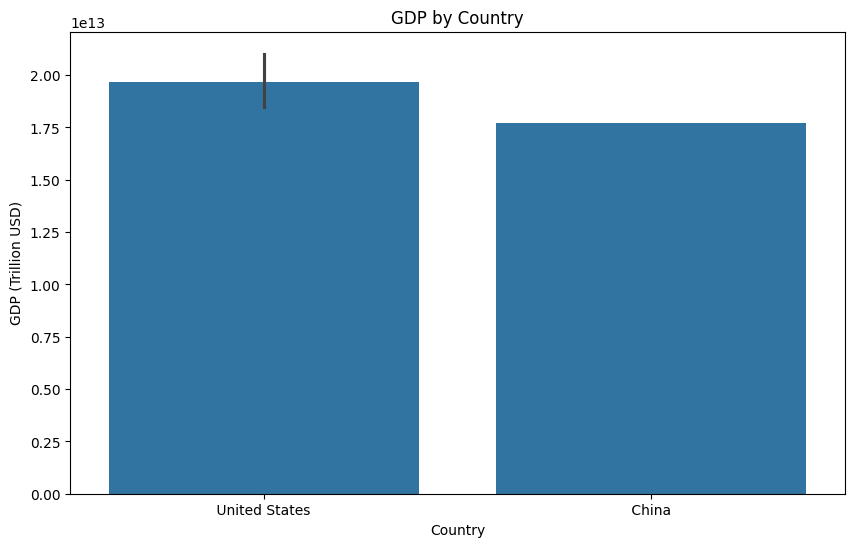

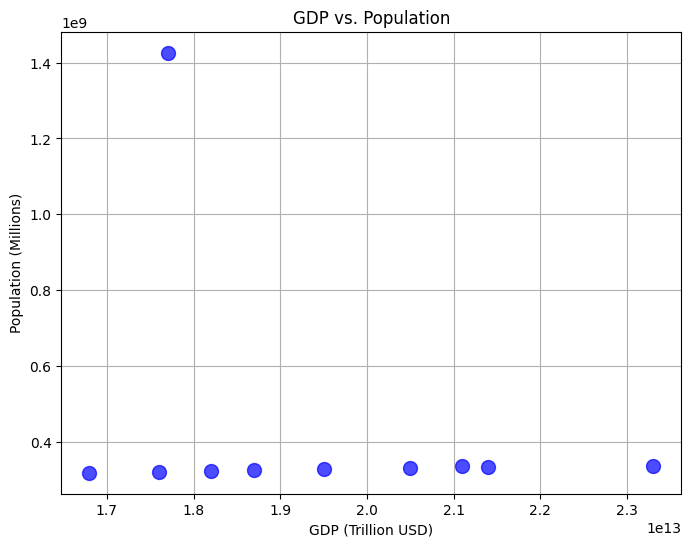

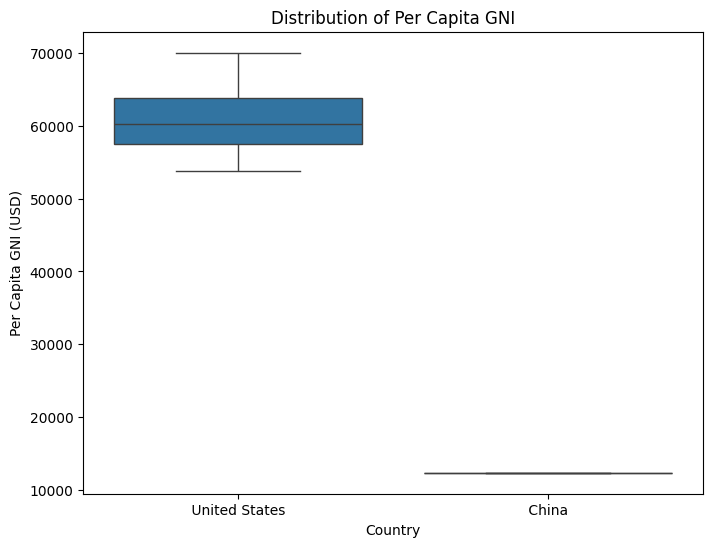

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
top_10_gdp = economic_data.nlargest(10, 'Gross Domestic Product (GDP)')


# Visualization 1: Bar Chart for GDP by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Gross Domestic Product (GDP)', data=top_10_gdp)
plt.xlabel('Country')
plt.ylabel('GDP (Trillion USD)')
plt.title('GDP by Country')
plt.show()

# Visualization 2: Scatter Plot: GDP vs. Population
plt.figure(figsize=(8, 6))
plt.scatter(top_10_gdp['Gross Domestic Product (GDP)'], top_10_gdp['Population'], s=100, c='b', alpha=0.7)
plt.xlabel('GDP (Trillion USD)')
plt.ylabel('Population (Millions)')
plt.title('GDP vs. Population')
plt.grid(True)
plt.show()



# Visualization 6: Box Plot: Distribution of Per Capita GNI
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='Per capita GNI', data=top_10_gdp)
plt.xlabel('Country')
plt.ylabel('Per Capita GNI (USD)')
plt.title('Distribution of Per Capita GNI')
plt.show()


In [12]:
economic_data.columns = economic_data.columns.str.strip()

In [13]:
# Check for missing values in Brent oil prices data
print(brent_data.isnull().sum())

# Check for missing values in economic indicators data
print(economic_data.isnull().sum())

# Handle missing values (example: forward fill for Brent oil prices)
brent_data.fillna(method='ffill', inplace=True)

# Convert Year column to datetime in economic data and set as index
economic_data['Date'] = pd.to_datetime(economic_data['Year'].astype(str) + '-12-31')
economic_data.set_index('Date', inplace=True)

# Drop the original 'Year' column
economic_data.drop(columns=['Year'], inplace=True)

# Display the preprocessed datasets
print(brent_data.head())
print(economic_data.head())


Price    0
dtype: int64
CountryID                                                                                      0
Country                                                                                        0
Year                                                                                           0
AMA exchange rate                                                                              0
IMF based exchange rate                                                                        0
Population                                                                                     0
Currency                                                                                       0
Per capita GNI                                                                                 0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           121
Changes in inventories                                                                      1841
Constr

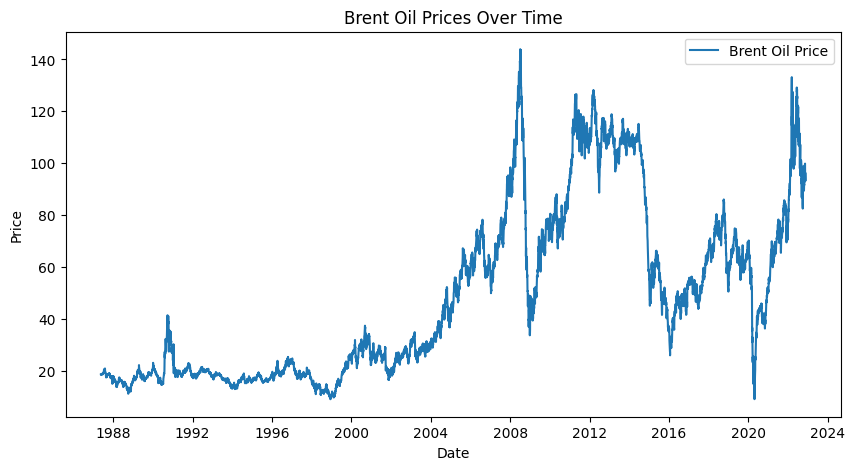

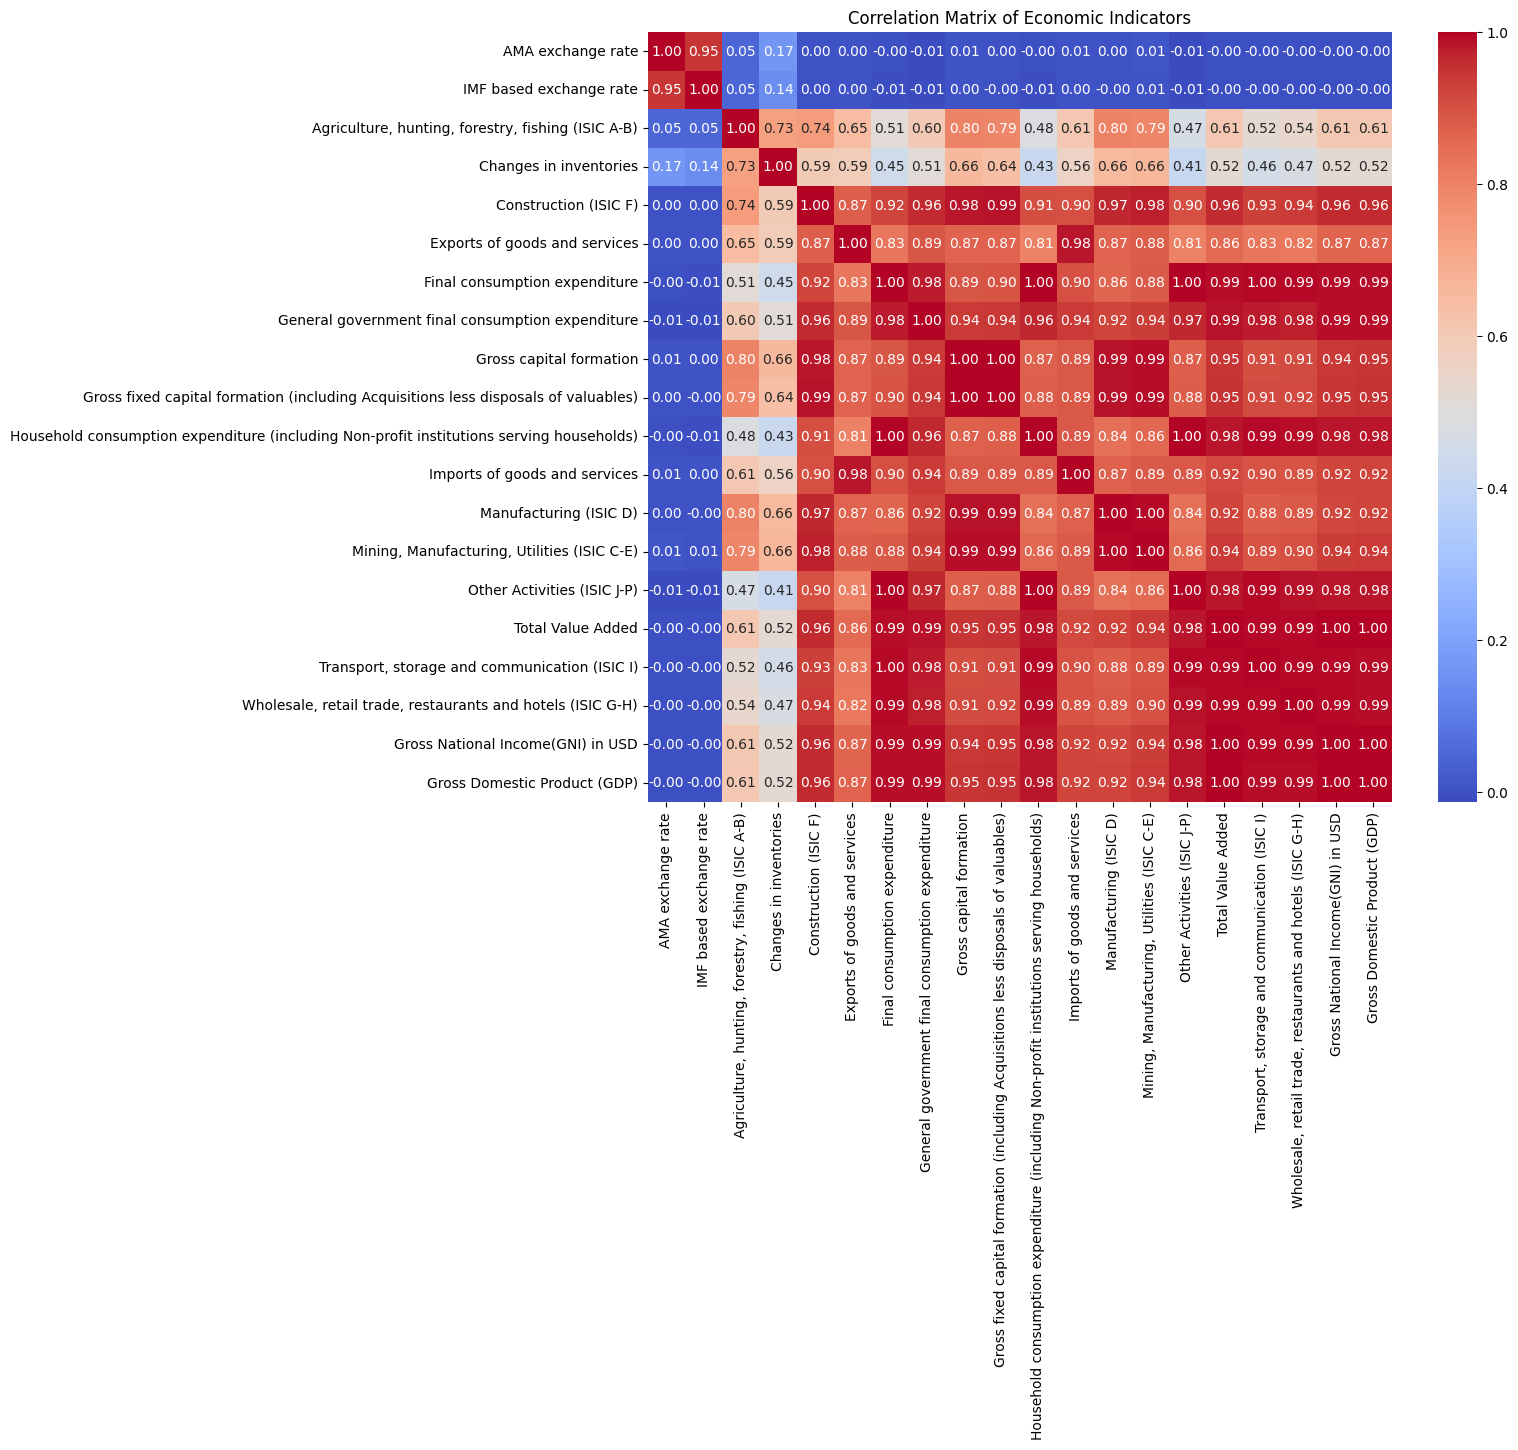

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Brent oil prices
plt.figure(figsize=(10, 5))
plt.plot(brent_data.index, brent_data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
numeric_columns = economic_data.select_dtypes(include=['float64', 'int32']).columns
# Correlation matrix for economic indicators
plt.figure(figsize=(12, 10))
correlation_matrix = economic_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


In [16]:
from statsmodels.tsa.api import VAR
import pandas as pd
# Merge Brent oil prices with economic data on Date
merged_data = brent_data.merge(economic_data, left_index=True, right_index=True, how='inner')
#merged_data=pd.read_csv('merged_data.csv')
# Select relevant columns for VAR model
var_data = merged_data[['Price', 'Gross Domestic Product (GDP)', 'IMF based exchange rate', 'Population', 'Mining, Manufacturing, Utilities (ISIC C-E)']]

# Fit VAR model
model = VAR(var_data)
results = model.fit(maxlags=15, ic='aic')

# Print summary of the results
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Jul, 2024
Time:                     16:01:08
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    159.601
Nobs:                     4831.00    HQIC:                   159.292
Log likelihood:          -418284.    FPE:                1.27892e+69
AIC:                      159.124    Det(Omega_mle):     1.18895e+69
--------------------------------------------------------------------
Results for equation Price
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                   0.067065         0.050079            1.339           0.181
L1.Price                               

In [17]:
merged_data.to_csv('merged_data.csv')

In [18]:
merged_data.isnull().sum()

Price                                                                                         0
CountryID                                                                                     0
Country                                                                                       0
AMA exchange rate                                                                             0
IMF based exchange rate                                                                       0
Population                                                                                    0
Currency                                                                                      0
Per capita GNI                                                                                0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           57
Changes in inventories                                                                      785
Construction (ISIC F)                   

In [19]:
merged_data.columns

Index(['Price', 'CountryID', 'Country', 'AMA exchange rate',
       'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC D)',
       'Mining, Manufacturing, Utilities (ISIC C-E)',
       'Other Activities (ISIC J-P)', 'Total Value Added',
       'Transport, storage and communication (ISIC I)',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)'],
   

Epoch 1/50
224/224 [==============================] - 20s 65ms/step - loss: 0.0039 - val_loss: 7.5240e-04
Epoch 2/50
224/224 [==============================] - 14s 61ms/step - loss: 3.3270e-04 - val_loss: 6.2514e-04
Epoch 3/50
224/224 [==============================] - 14s 62ms/step - loss: 2.7720e-04 - val_loss: 5.5148e-04
Epoch 4/50
224/224 [==============================] - 14s 61ms/step - loss: 2.5562e-04 - val_loss: 4.8674e-04
Epoch 5/50
224/224 [==============================] - 14s 61ms/step - loss: 2.5706e-04 - val_loss: 4.5614e-04
Epoch 6/50
224/224 [==============================] - 14s 61ms/step - loss: 2.3181e-04 - val_loss: 4.7502e-04
Epoch 7/50
224/224 [==============================] - 14s 62ms/step - loss: 2.0428e-04 - val_loss: 4.4645e-04
Epoch 8/50
224/224 [==============================] - 16s 70ms/step - loss: 1.8124e-04 - val_loss: 4.7636e-04
Epoch 9/50
224/224 [==============================] - 14s 61ms/step - loss: 1.8043e-04 - val_loss: 3.5271e-04
Epoch 10/50
22

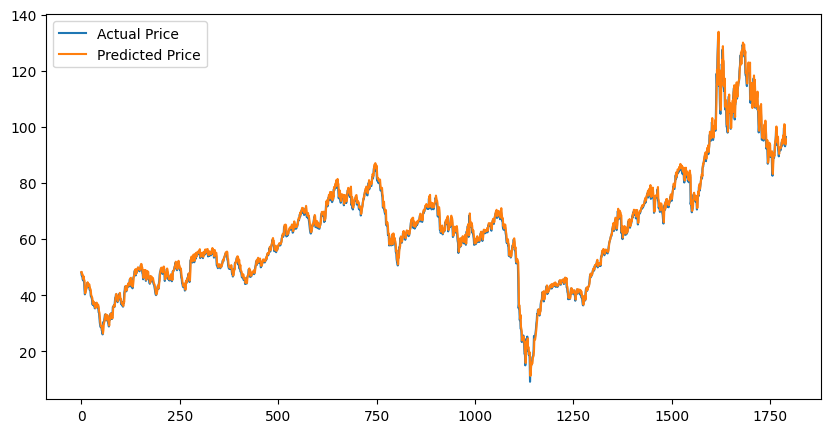

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(brent_data[['Price']])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 60
sequences = create_sequences(scaled_data, seq_length)
X = sequences[:, :-1]
y = sequences[:, -1]

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test), label='Actual Price')
plt.plot(range(len(predictions)), predictions, label='Predicted Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


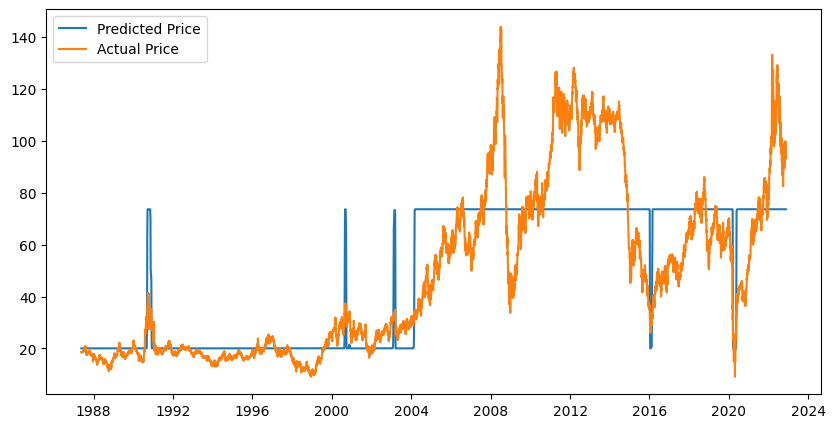

In [21]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit the Markov-Switching Model
ms_model = MarkovRegression(brent_data['Price'], k_regimes=2, trend='c', switching_variance=True)
ms_model_fit = ms_model.fit()

# Make predictions
predictions = ms_model_fit.predict()

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(brent_data.index, predictions, label='Predicted Price')
plt.plot(brent_data.index, brent_data['Price'], label='Actual Price')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure the indices match between predictions and actual values
var_predictions = results.fittedvalues['Price']
var_data_aligned = var_data.iloc[-len(var_predictions):]

# Calculate performance metrics for VAR model
var_rmse = np.sqrt(mean_squared_error(var_data_aligned['Price'], var_predictions))
var_mae = mean_absolute_error(var_data_aligned['Price'], var_predictions)
var_r2 = r2_score(var_data_aligned['Price'], var_predictions)

print(f"VAR Model - RMSE: {var_rmse}, MAE: {var_mae}, R2: {var_r2}")


VAR Model - RMSE: 1.7243109009333009, MAE: 0.14170622752984108, R2: 0.9970643725108346


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_test and predictions have the same shape and are aligned
y_test_aligned = y_test[-len(predictions):]

# Check if they are already numpy arrays, if not convert them
if isinstance(y_test_aligned, pd.Series):
    y_test_aligned = y_test_aligned.values
if isinstance(predictions, pd.Series):
    predictions = predictions.values

# Reshape if necessary
y_test_aligned = y_test_aligned.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)

# Check lengths
print(f"y_test_aligned length: {len(y_test_aligned)}")
print(f"predictions length: {len(predictions)}")

# Ensure they are the same length
if len(y_test_aligned) != len(predictions):
    min_len = min(len(y_test_aligned), len(predictions))
    y_test_aligned = y_test_aligned[:min_len]
    predictions = predictions[:min_len]

# Calculate performance metrics for LSTM model
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test_aligned), scaler.inverse_transform(predictions)))
lstm_mae = mean_absolute_error(scaler.inverse_transform(y_test_aligned), scaler.inverse_transform(predictions))
lstm_r2 = r2_score(y_test_aligned, predictions)  # No need to inverse transform here

print(f"LSTM Model - RMSE: {lstm_rmse:.2f}, MAE: {lstm_mae:.2f}, R2: {lstm_r2:.2f}")


y_test_aligned length: 1791
predictions length: 9011
LSTM Model - RMSE: 3075.38, MAE: 2854.88, R2: -22172.05


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure brent_data['Price'] and predictions have the same shape and are aligned
brent_prices_aligned = brent_data['Price'][-len(predictions):]

# Convert to numpy arrays if they aren't already
if isinstance(brent_prices_aligned, pd.Series):
    brent_prices_aligned = brent_prices_aligned.values
if isinstance(predictions, pd.Series):
    predictions = predictions.values

# Reshape if necessary
brent_prices_aligned = brent_prices_aligned.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)

# Check lengths
print(f"brent_prices_aligned length: {len(brent_prices_aligned)}")
print(f"predictions length: {len(predictions)}")

# Ensure they are the same length
if len(brent_prices_aligned) != len(predictions):
    min_len = min(len(brent_prices_aligned), len(predictions))
    brent_prices_aligned = brent_prices_aligned[:min_len]
    predictions = predictions[:min_len]

# Calculate performance metrics for Markov-Switching model
ms_rmse = np.sqrt(mean_squared_error(brent_prices_aligned, predictions))
ms_mae = mean_absolute_error(brent_prices_aligned, predictions)
ms_r2 = r2_score(brent_prices_aligned, predictions)

print(f"Markov-Switching Model - RMSE: {ms_rmse:.2f}, MAE: {ms_mae:.2f}, R2: {ms_r2:.2f}")


brent_prices_aligned length: 1791
predictions length: 1791
Markov-Switching Model - RMSE: 46.79, MAE: 41.60, R2: -4.13


In [50]:
import pandas as pd
from statsmodels.tsa.api import VAR
import pickle

# Merge Brent oil prices with economic data on Date
merged_data = brent_data.merge(economic_data, left_index=True, right_index=True, how='inner')

# Select relevant columns for VAR model
var_data = merged_data[['Price', 'Gross Domestic Product (GDP)', 'IMF based exchange rate', 'Population', 'Mining, Manufacturing, Utilities (ISIC C-E)']]

# Fit VAR model
model = VAR(var_data)
results = model.fit(maxlags=15, ic='aic')

# Save the VAR model using pickle
with open('var_model.pkl', 'wb') as f:
    pickle.dump(results, f)

print("VAR model saved successfully as 'var_model.pkl'")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


VAR model saved successfully as 'var_model.pkl'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Jul, 2024
Time:                     19:49:17
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    159.601
Nobs:                     4831.00    HQIC:                   159.292
Log likelihood:          -418284.    FPE:                1.27892e+69
AIC:                      159.124    Det(Omega_mle):     1.18895e+69
--------------------------------------------------------------------
Results for equation Price
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                   0.067065         0.050079            1.339           0.181
L1.Price                               

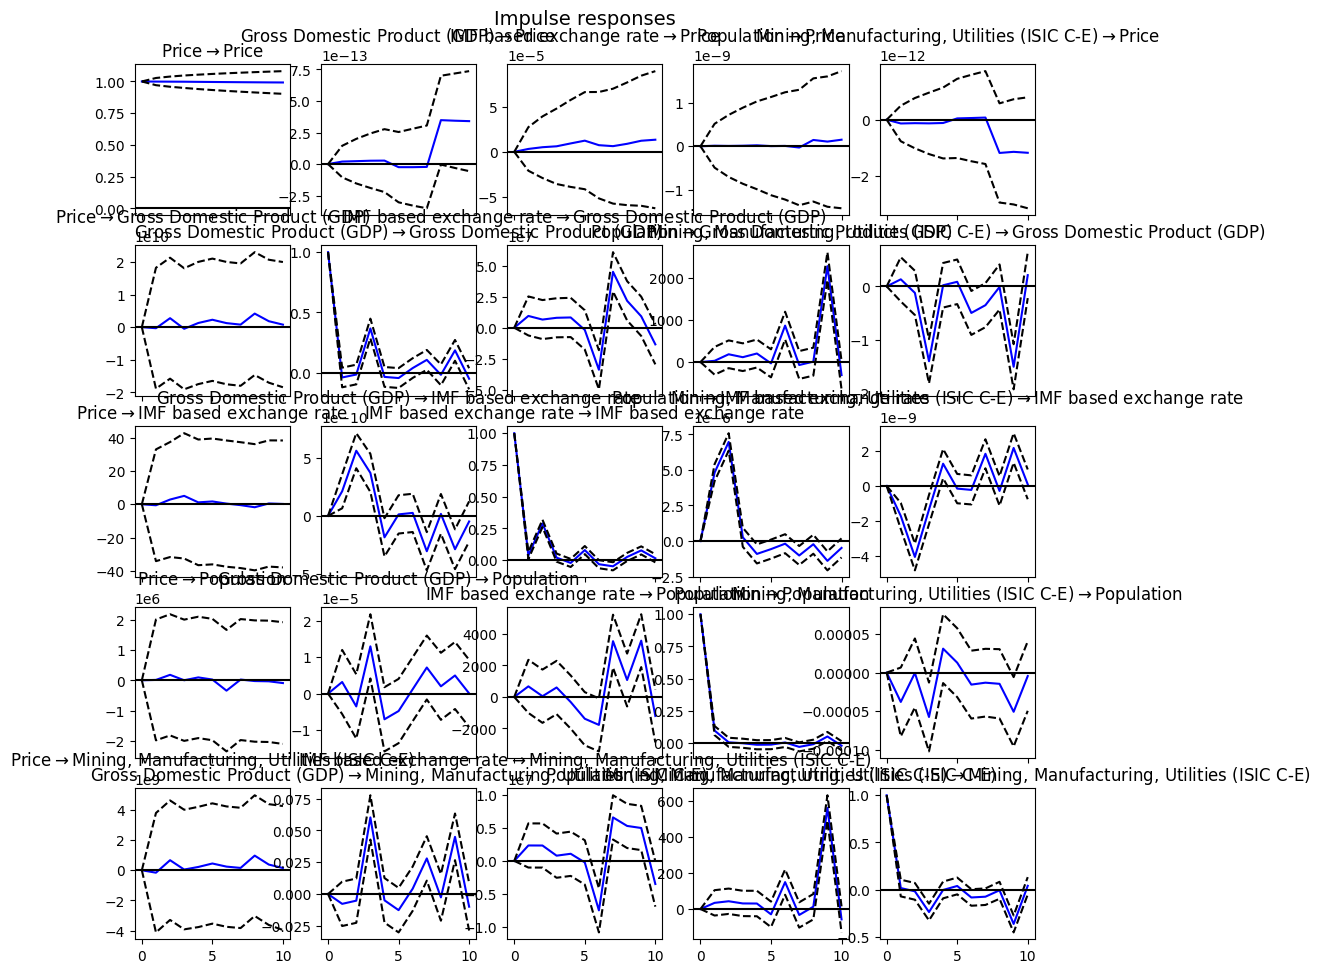

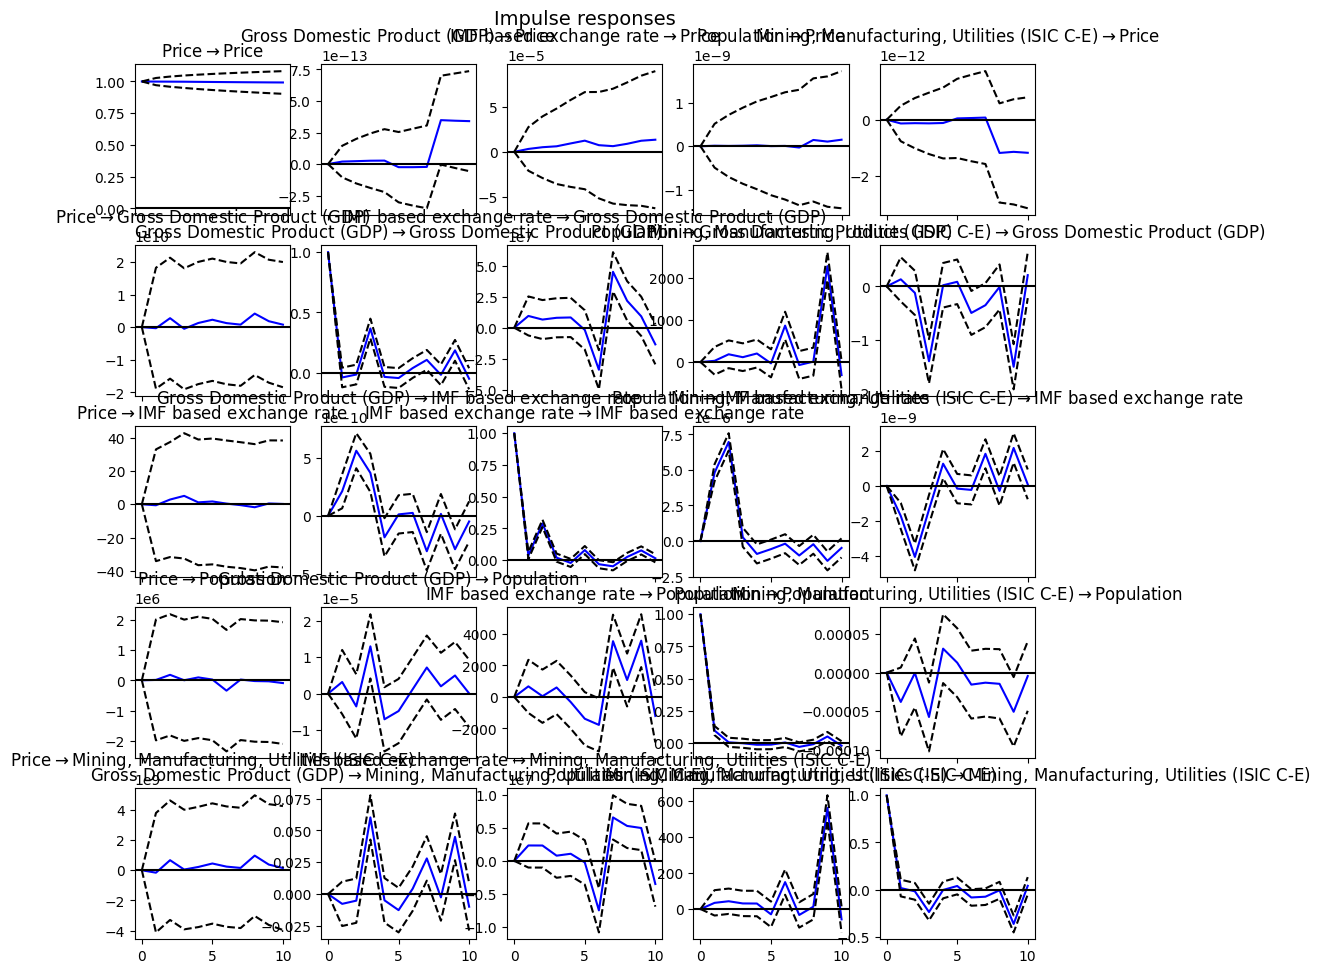

In [51]:
from statsmodels.tsa.api import VAR
import pandas as pd


# Fit VAR model
model = VAR(var_data)
results = model.fit(maxlags=15, ic='aic')

# Print summary of the VAR model results
print(results.summary())

# Extract coefficients
coefficients = results.coefs

# Extract impulse response functions
irf = results.irf()

# Plot impulse response functions
irf.plot(orth=False)

